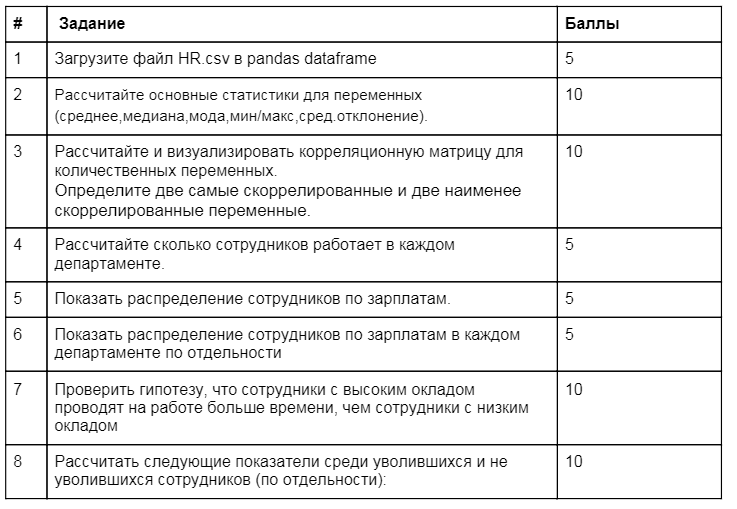

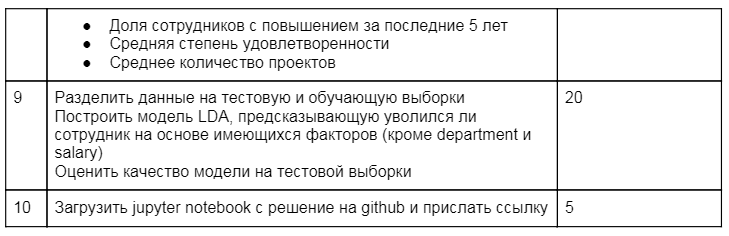

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
min_ = df[['satisfaction_level', 'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']].min()
max_ = df[['satisfaction_level', 'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']].max()
mean = df[['satisfaction_level', 'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']].mean()
mode = df[['satisfaction_level', 'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']].mode()
disp = df[['satisfaction_level', 'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']].var()
median = df[['satisfaction_level', 'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']].median()
print(f'min: \n{min_}', f'\n\nmax: \n{max_}', f'\n\nдисперсия: \n{disp}', 
      f'\n\nсреднее значение: \n{mean}', f'\n\nмедиана: \n{median}', f'\n\nмода: \n{mode}')

min: 
satisfaction_level        0.09
last_evaluation           0.36
number_project            2.00
average_montly_hours     96.00
time_spend_company        2.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
dtype: float64 

max: 
satisfaction_level         1.0
last_evaluation            1.0
number_project             7.0
average_montly_hours     310.0
time_spend_company        10.0
Work_accident              1.0
left                       1.0
promotion_last_5years      1.0
dtype: float64 

дисперсия: 
satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
dtype: float64 

среднее значение: 
satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
averag

# 2. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

<Axes: >

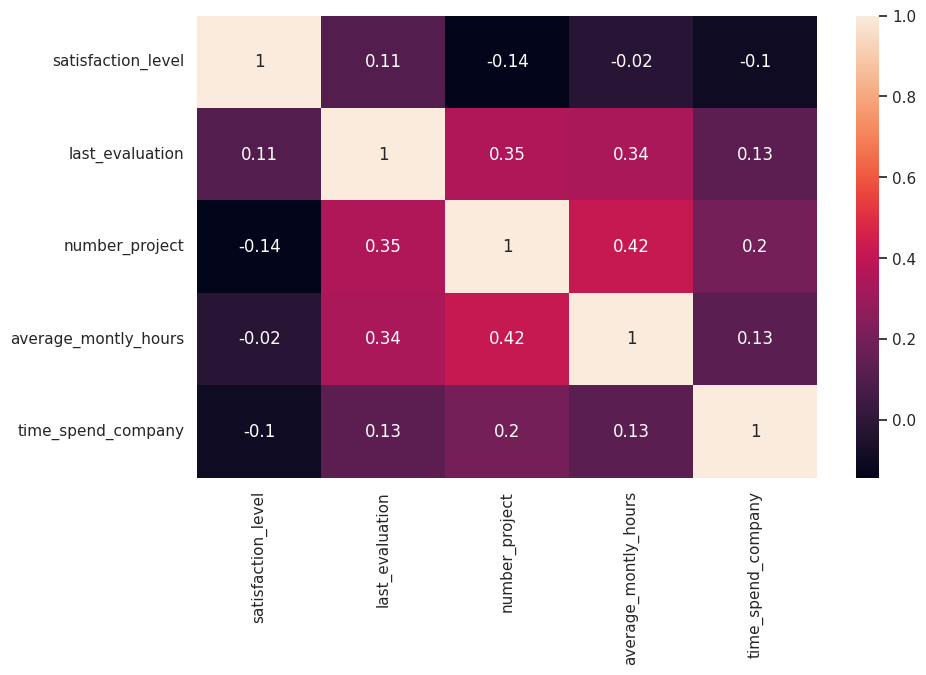

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})
sns.heatmap(df[['satisfaction_level', 'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']].corr(), annot=True)

Наиболее скоррелированными величинами являются количество выполненых проектов и среднее количество часов в месяц на рабочем месте, что в целом логично. 

А наименее скоррелированными среднее количество часов в месяц на рабочем месте и уровень удовлетворенности работой.

# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
employees = df[df['left'] == 0].groupby('department').count()[['satisfaction_level']].rename(columns = {'satisfaction_level' : 'count of employees'})
employees

,count of employees
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


# 5. Показать распределение сотрудников по зарплатам

In [194]:
#Без учета уволившихся:
#salary = df[df['left'] == 0].groupby('salary').count()[['satisfaction_level']].rename(columns = {'satisfaction_level' : 'count of employees'})
#С учетом уволившихся:
salary = df.groupby('salary').count()[['satisfaction_level']].rename(columns = {'satisfaction_level' : 'count of employees'})
salary

,count of employees
salary,
high,1237
low,7316
medium,6446


# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [9]:
#Без учета уволившихся:
#salary_in_department = df[df['left'] == 0].groupby(['department', 'salary']).count()[['satisfaction_level']].rename(columns = {'satisfaction_level' : 'count of employees'})
#С учетом уволившихся:
salary_in_department = df.groupby(['department', 'salary']).count()[['satisfaction_level']].rename(columns = {'satisfaction_level' : 'count of employees'})
salary_in_department

count of employees
department  salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [195]:
len(df[df['salary'] == 'low'])

7316

In [196]:
len(df[df['salary'] == 'high'])

1237

Для проверки этой гипотезы используем t-тест Стьюдента, в параметре equal_var укжем False, так как выборки имеют разный размер.

In [197]:
from scipy.stats import ttest_ind

high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

stat, p_value = ttest_ind(high_salary, low_salary, equal_var = False)

print(f"Статистика = {stat:.5f}, p = {p_value:.10f}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу, средние, вероятно, различаются")
else:
    print("Не отклоняем нулевую гипотезу, средние, вероятно, одинаковы")


Статистика = -0.76243, p = 0.4459045542
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковы


# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [58]:
print('Доля сторудников с повышением за последние 5 лет среди уволившихся:', round(len(df.loc[(df['left'] == 1) & (df['promotion_last_5years'] == 1)]) / len(df[df['left'] == 1])*100,2),"%")
print('Доля сторудников с повышением за последние 5 лет среди не уволившихся:', round(len(df.loc[(df['left'] == 0) & (df['promotion_last_5years'] == 1)]) / len(df[df['left'] == 0])*100,2),"%\n")

print('Средняя степень удовлетворенности среди уволившихся:', round(df.loc[(df['left'] == 1)]['satisfaction_level'].mean(),2))
print('Средняя степень удовлетворенности среди не уволившихся:', round(df.loc[(df['left'] == 0)]['satisfaction_level'].mean(),2),'\n')

print('Среднее количество проектов на сотрудника среди уволившихся:', round(df.loc[(df['left'] == 1)]['number_project'].sum() / len(df.loc[(df['left'] == 1)]),1))
print('Среднее количество проектов на сотрудника среди не уволившихся:', round(df.loc[(df['left'] == 0)]['number_project'].sum() / len(df.loc[(df['left'] == 0)]),1))

Доля сторудников с повышением за последние 5 лет среди уволившихся: 0.53 %
Доля сторудников с повышением за последние 5 лет среди не уволившихся: 2.63 %

Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди не уволившихся: 0.67 

Среднее количество проектов на сотрудника среди уволившихся: 3.9
Среднее количество проектов на сотрудника среди не уволившихся: 3.8


# 9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [116]:
for_lda = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident', 'left',	'promotion_last_5years']]
for_lda

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(for_lda, for_lda['left'], random_state = 42)

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [119]:
result = pd.DataFrame([Y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
10371,0.0,NaN
12541,1.0,NaN
2656,0.0,0.0
6759,0.0,NaN


In [130]:
from sklearn.metrics import precision_score
precision_score(Y_test, lda.predict(X_test))

0.47121535181236673

47% получившихся положительных ответов (сотрудник уволился) действительно такими являются

In [131]:
from sklearn.metrics import recall_score
recall_score(Y_test, lda.predict(X_test))

0.2463768115942029

25% Положительных результов от всех положительных результатов нашел алгоритм

In [138]:
from sklearn.metrics import classification_report
res = classification_report(Y_test, lda.predict(X_test))
print(res)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



Вывод: для понимания уволится сотрудник или нет алгоритм не очень подходит, так как при оценки точности f-мерой получилось всего 32%